In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [40]:
train = pd.read_csv('train.csv', index_col = False)
test = pd.read_csv('test.csv', index_col = False)

In [41]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
X_train = train.iloc[:30000, 1:]
y_train = train.iloc[:30000, 0]
X_val = train.iloc[30000:42000, 1:]
y_val = train.iloc[30000:42000, 0]
X_test = test

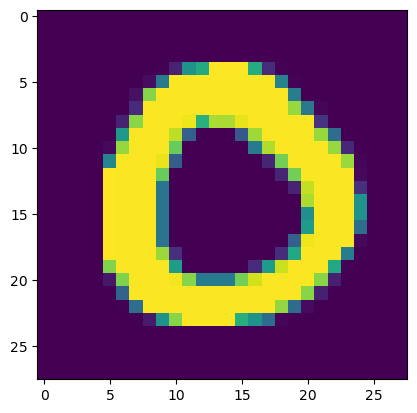

In [43]:
plt.imshow(X_train.iloc[4].values.reshape((28,28)))

In [44]:
from keras.utils import to_categorical

train_images = X_train.values.reshape((X_train.shape[0], 28,28,1))
train_labels = to_categorical(y_train)

test_images = X_test.values.reshape((X_test.shape[0], 28,28,1))

val_images = X_val.values.reshape((X_val.shape[0], 28,28,1))
val_labels = to_categorical(y_val)


In [45]:
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255
val_images = val_images.astype('float32')/255

In [46]:
import tensorflow as tf
from keras import Sequential, layers
from keras import optimizers

In [47]:
model = Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))


In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [49]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'rmsprop',
    metrics=['acc'])

In [51]:
history = model.fit(train_images, train_labels, epochs = 20, batch_size = 64, validation_data = (val_images, val_labels))

Epoch 1/20
469/469 [==============================] - 27s 58ms/step - loss: 0.0649 - acc: 0.9801 - val_loss: 0.0557 - val_acc: 0.9835
Epoch 2/20
469/469 [==============================] - 26s 56ms/step - loss: 0.0437 - acc: 0.9862 - val_loss: 0.0539 - val_acc: 0.9837
Epoch 3/20
469/469 [==============================] - 26s 56ms/step - loss: 0.0318 - acc: 0.9897 - val_loss: 0.0407 - val_acc: 0.9874
Epoch 4/20
469/469 [==============================] - 26s 55ms/step - loss: 0.0239 - acc: 0.9926 - val_loss: 0.0419 - val_acc: 0.9871
Epoch 5/20
469/469 [==============================] - 27s 57ms/step - loss: 0.0198 - acc: 0.9932 - val_loss: 0.0407 - val_acc: 0.9886
Epoch 6/20
469/469 [==============================] - 28s 60ms/step - loss: 0.0162 - acc: 0.9947 - val_loss: 0.0380 - val_acc: 0.9902
Epoch 7/20
469/469 [==============================] - 27s 58ms/step - loss: 0.0122 - acc: 0.9962 - val_loss: 0.0538 - val_acc: 0.9876
Epoch 8/20
469/469 [==============================] - 26s 55ms

In [52]:
model.evaluate(val_images, val_labels)

375/375 [==============================] - 4s 9ms/step - loss: 0.0817 - acc: 0.9899


[0.08174935728311539, 0.9899166822433472]

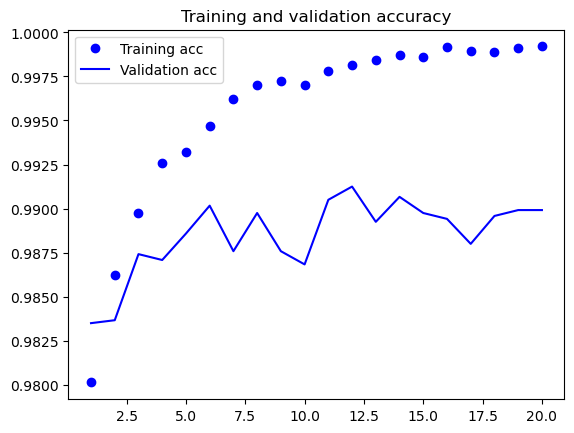

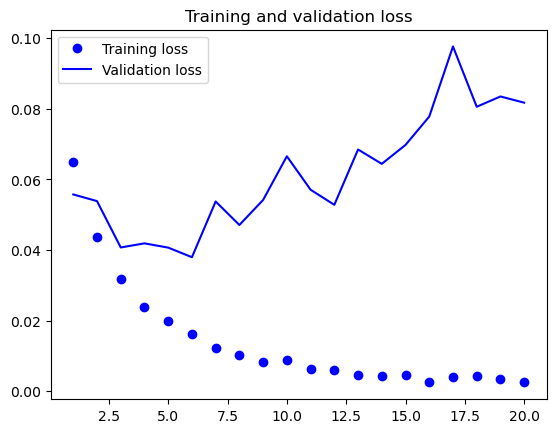

In [57]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [58]:
predictions = model.predict(test_images)

875/875 [==============================] - 8s 9ms/step


In [60]:
predictions = np.argmax(predictions,axis = 1)

In [62]:
predict = pd.Series(predictions, name="Label")
image_id = pd.Series(np.arange(1,len(predict)+1), name = "ImageId")

In [63]:
output_file = pd.concat([image_id,predict],axis =1)
output_file

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [64]:
output_file.to_csv('submission.csv', index=False)